In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# set hangle font set 한글깨짐문제해결
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
sns.set(font='AppleGothic')

In [2]:
df = pd.read_csv('ml_data.csv')

In [3]:
# change int to float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 0 to 5890
Data columns (total 32 columns):
거래금액              5891 non-null int64
건축년도              5891 non-null int64
거래년도              5891 non-null int64
법정동               5891 non-null object
아파트               5891 non-null object
거래월               5891 non-null int64
전용면적(평)           5891 non-null float64
층                 5891 non-null int64
복도형식              5891 non-null object
난방방식              5891 non-null object
관리방식              5891 non-null object
주차공간(지상)          5891 non-null float64
주차공간(지하)          5891 non-null float64
버스정류장             5891 non-null object
지하철               5891 non-null object
동갯수               5891 non-null float64
일반관리인원            5891 non-null float64
엘리베이터갯수           5891 non-null float64
지하철역              5891 non-null object
주변편의시설갯수(관공서)     5891 non-null float64
주변편의시설갯수(병원)      5891 non-null int64
주변편의시설갯수(백화점)     5891 non-null float64
주변편의시설갯수(대형상가)    5891 non-null f

In [4]:
df.isnull().sum()

거래금액              0
건축년도              0
거래년도              0
법정동               0
아파트               0
거래월               0
전용면적(평)           0
층                 0
복도형식              0
난방방식              0
관리방식              0
주차공간(지상)          0
주차공간(지하)          0
버스정류장             0
지하철               0
동갯수               0
일반관리인원            0
엘리베이터갯수           0
지하철역              0
주변편의시설갯수(관공서)     0
주변편의시설갯수(병원)      0
주변편의시설갯수(백화점)     0
주변편의시설갯수(대형상가)    0
주변편의시설갯수(기타)      0
주변편의시설갯수(공원)      0
주변교육시설갯수(초등학교)    0
주변교육시설갯수(중학교)     0
주변교육시설갯수(고등학교)    0
주변교육시설갯수(대학교)     0
부대/복리시설갯수         0
주변편의시설(총)         0
주변교육시설(총)         0
dtype: int64

# 데이터 전처리

### 선형회귀

선형회귀모델을 훈련시키기위해서는 숫자형 데이터가 필요하다.

EDA에서 버스정류장과 지하철 데이터가 가격과 상관관계가 있는것을 봤으므로 숫자형으로 바꿔보겠다.

In [5]:
Counter(df['지하철'])

Counter({'10~15분이내': 806,
         '15~20분이내': 953,
         '5~10분이내': 1135,
         '5분이내': 2759,
         'NO!': 238})

In [6]:
Counter(df['버스정류장'])

Counter({'10~15분이내': 55, '5~10분이내': 1327, '5분이내': 4509})

버스정류장과 지하철피쳐는 집에서부터의 거리니까 짧을수록 높은가격. 
    거래금액과 선형관계이므로, 지하철은 5분이내: 4, 5~10분이내: 3, 10~15분이내: 2, 15~20분이내: 1, NO!: 0
                        버스정류장 5분이내: 2, 5~10분이내: 1, 10~15분이내: 0

In [7]:
train_mapping = {'5분이내': 4, '5~10분이내': 3,'10~15분이내': 2, '15~20분이내': 1, 'NO!': 0}
bus_mapping = {'5분이내': 2, '5~10분이내': 1, '10~15분이내': 0}

In [8]:
df['지하철'] = df['지하철'].map(train_mapping)
df['버스정류장'] = df['버스정류장'].map(bus_mapping)

Done!

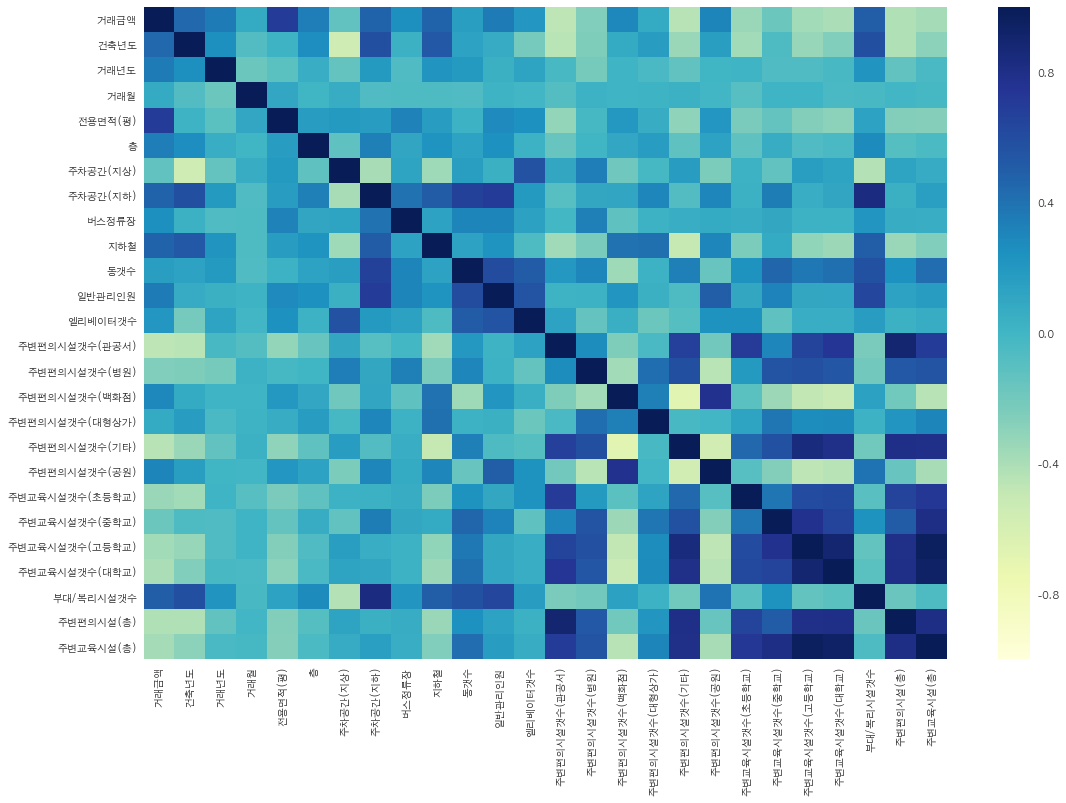

In [9]:
plt.subplots(figsize=(18,12))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [10]:
corr.iloc[0]

거래금액              1.000000
건축년도              0.447875
거래년도              0.357682
거래월               0.081924
전용면적(평)           0.697238
층                 0.336729
주차공간(지상)         -0.130549
주차공간(지하)          0.473252
버스정류장             0.252062
지하철               0.473886
동갯수               0.162684
일반관리인원            0.358329
엘리베이터갯수           0.208248
주변편의시설갯수(관공서)    -0.462234
주변편의시설갯수(병원)     -0.257282
주변편의시설갯수(백화점)     0.295732
주변편의시설갯수(대형상가)    0.082979
주변편의시설갯수(기타)     -0.442299
주변편의시설갯수(공원)      0.310906
주변교육시설갯수(초등학교)   -0.341186
주변교육시설갯수(중학교)    -0.166439
주변교육시설갯수(고등학교)   -0.371840
주변교육시설갯수(대학교)    -0.403080
부대/복리시설갯수         0.505282
주변편의시설(총)        -0.419763
주변교육시설(총)        -0.377904
Name: 거래금액, dtype: float64

In [11]:
df['거래금액'].skew()

0.46488214703700165

# 데이터 선택

In [12]:
# 숫자형 데이터 선택
features = df.dtypes[df.dtypes != "object"].index

# 숫자형 데이터로만 구성된 데이터 프레임 만들기
df = df[features]

In [13]:
df.shape

(5891, 26)

# 정규화

데이터가 다른 스케일로 되어있으므로, 같은 스케일로 만들기 위해 정규화를 사용

In [14]:
from sklearn import preprocessing

X = df.iloc[:, 1:].values
y= df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

# Cross - validation

train: 70% , test: 30%

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# 모델훈련

In [16]:
from sklearn import linear_model

# fit linear model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
coef = lr.coef_
lr.coef_

array([ 1665.61352097,  3863.64573841,   851.98867593,  7171.07898123,
         925.92207545,  -571.29024658,  1536.09581505,   909.2716236 ,
        1068.43481844, -3043.22869749,  -748.54806572,  2807.9241231 ,
       -2487.17312827,  -256.73068736,  4491.18564317, -1934.94935162,
        2476.99571951, -3237.99765673, -1104.28065724,  -279.97013282,
         153.92160558,  1217.25129071,  3273.60348228,   464.560205  ,
         159.43363025])

In [18]:
coef_df = pd.Series(coef, index=df.columns[1:])

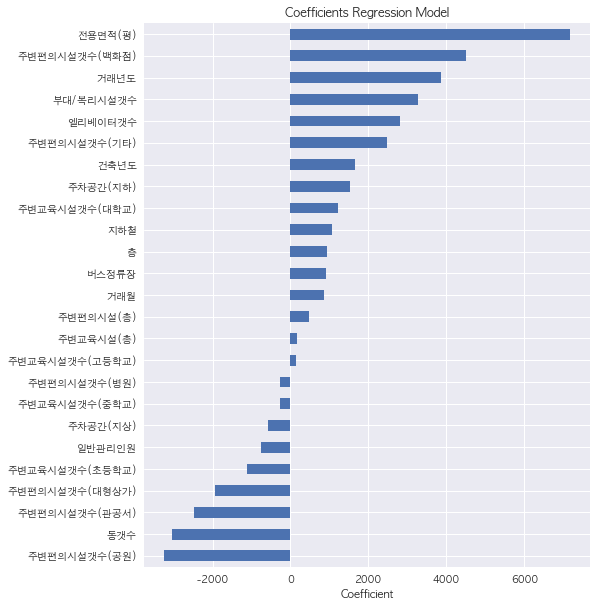

In [19]:
plt.rcParams['figure.figsize'] = (8, 10)
coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model")
plt.xlabel("Coefficient")

In [20]:
print ("Root Mean squared error : %.3f" %(np.mean((lr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.3f' % lr.score(X_test, y_test))

Root Mean squared error : 4437.922
Variance score: 0.862


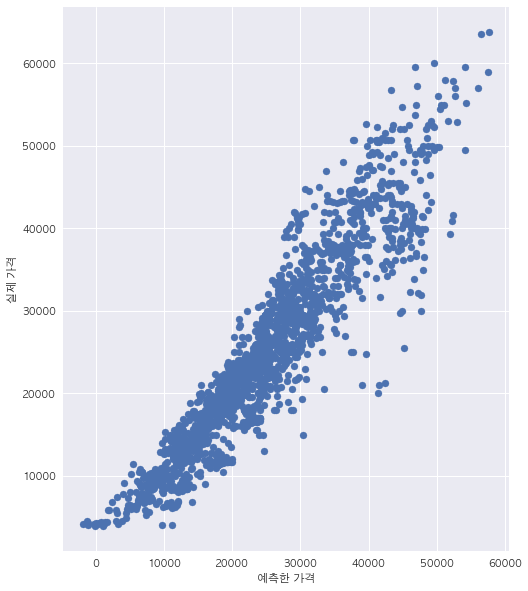

In [23]:
plt.scatter(lr.predict(X_test), y_test)

plt.xlabel('예측한 가격')
plt.ylabel('실제 가격')

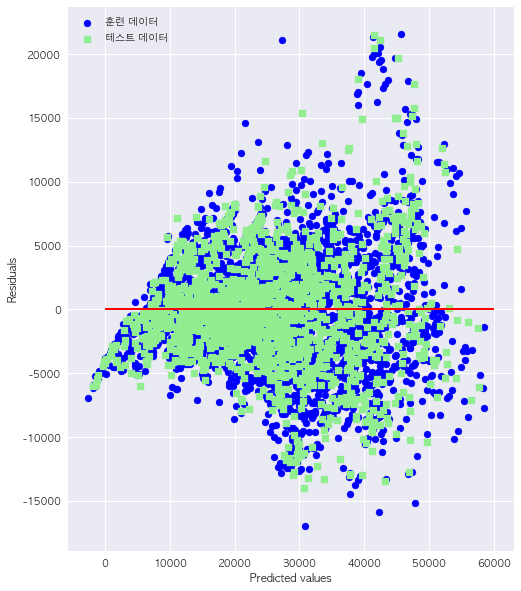

In [24]:
# residual plot
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='훈련 데이터')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='테스트 데이터')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0, xmax=60000, lw=2, color='red')
plt.figure(figsize=(20,10))
plt.show()

In [25]:
print("RMSE train: %.2f" % mean_squared_error(y_train, y_train_pred)**0.5)
print("RMSE test: %.2f"  % mean_squared_error(y_test, y_test_pred)**0.5)

RMSE train: 4391.79
RMSE test: 4437.92


이상치들이 보인다

# outliers

count     5891.000000
mean     24997.702937
std      12021.415773
min       3700.000000
25%      16300.000000
50%      23500.000000
75%      32900.000000
max      66200.000000
Name: 거래금액, dtype: float64

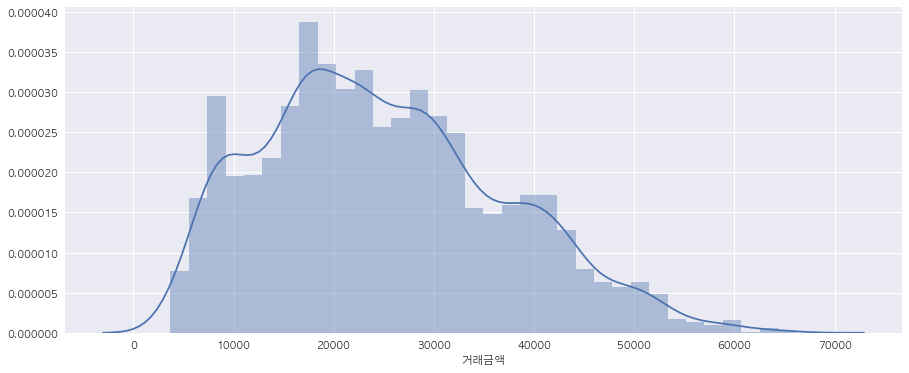

In [26]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(df['거래금액'])
df['거래금액'].describe()

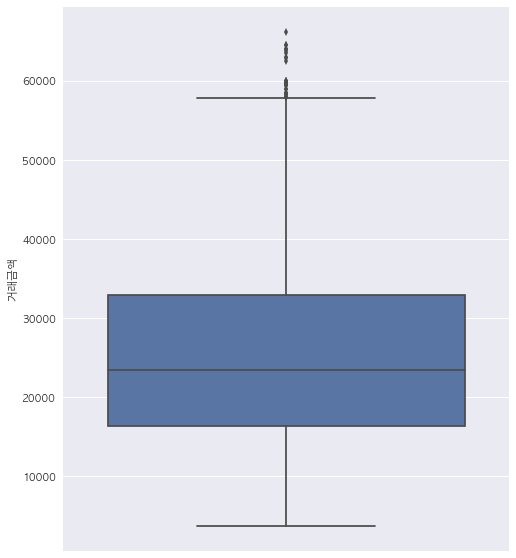

In [27]:
sns.boxplot(y=df['거래금액'])

박스플랏에서 보여주듯이 거래금액 58000원 이상이 이상치로 보여진다. 추출해보자

In [28]:
df.sort_values(by='거래금액').loc[df['거래금액']>58000]

,거래금액,건축년도,거래년도,거래월,전용면적(평),층,주차공간(지상),주차공간(지하),버스정류장,지하철,...,주변편의시설갯수(대형상가),주변편의시설갯수(기타),주변편의시설갯수(공원),주변교육시설갯수(초등학교),주변교육시설갯수(중학교),주변교육시설갯수(고등학교),주변교육시설갯수(대학교),부대/복리시설갯수,주변편의시설(총),주변교육시설(총)
5727,58200,2014,2017,7,30.5,20,90.0,1174.0,2,4,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,9,14.0,17.0
5560,58300,2007,2017,5,46.2,33,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4537,58500,2007,2015,12,54.2,12,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5653,58500,2007,2017,6,54.2,5,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4536,58500,2007,2015,12,46.2,15,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5177,59000,2007,2016,10,54.2,24,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5809,59000,2007,2017,7,54.2,5,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5121,59500,2007,2016,9,42.7,25,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5802,59500,2007,2017,7,46.2,42,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4421,59500,2007,2015,8,54.2,23,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0


32개의 이상치데이터를 지우고 다시 피팅

In [29]:
adj_df = df.drop(df.loc[df['거래금액']>50000].index, axis=0)

In [30]:
X = adj_df.iloc[:, 1:].values
y= adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# fit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_df = pd.Series(coef, index=adj_df.columns[1:])

In [31]:
print ("Root Mean squared error : %.3f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.3f' % slr.score(X_test, y_test))

Root Mean squared error : 4133.009
Variance score: 0.857


이전보다 조금 나은 결과를 보여준다

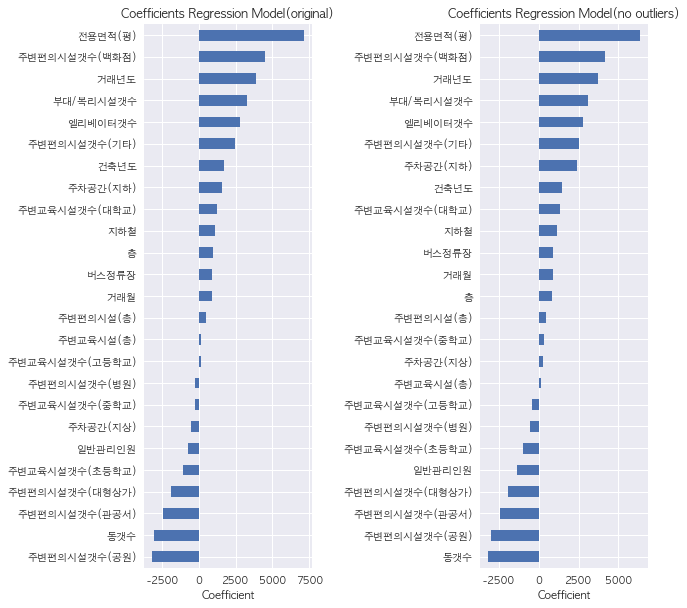

In [32]:
# compare
fig, ax = plt.subplots(nrows=1, ncols=2)

plt.subplot(1, 2, 1)
plt.rcParams['figure.figsize'] = (8, 10)
coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(original)")
plt.xlabel("Coefficient")


plt.subplot(1, 2, 2)
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(no outliers)")
plt.xlabel("Coefficient")

plt.subplots_adjust(wspace=1, right=1)

결과물 비교

몇몇 상관계수가 거의 0에 가까운 변수들을 제거해보자: 주변편의시설(총), 주변교육시설갯수(중학교), 주차공간(지상), 주변교육시설(총), 주변교육시설갯수(고등학교)

In [33]:
adj_df.drop(['주변편의시설(총)', '주변교육시설갯수(중학교)', '주차공간(지상)', '주변교육시설(총)', '주변교육시설갯수(고등학교)'], axis=1, inplace=True)

이상한점은 엘리베이터갯수, 주차공간(지하)이 높은상관계수를 보이는데 이것은 상식적으로 생각해봐도 말이안된다.

확인해보자

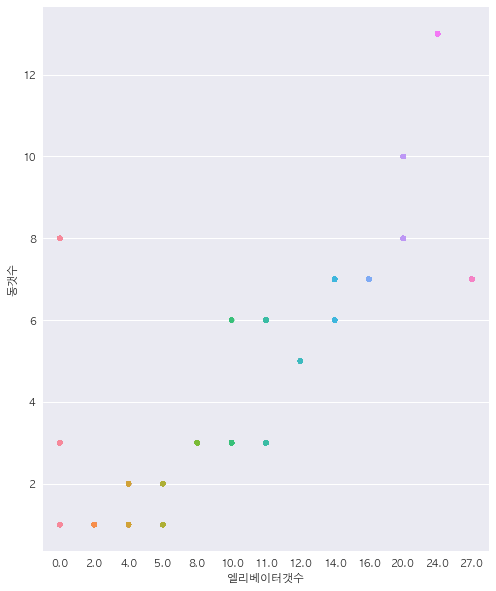

In [34]:
sns.stripplot(x='엘리베이터갯수', y='동갯수', data=adj_df)

동갯수와 엘리베이터갯수사이에는 선형적관계가 있다고 보여진다.
상식적으로 생각해봐도 동갯수가 많다면, 엘리베이터의 갯수도 많아져야한다.

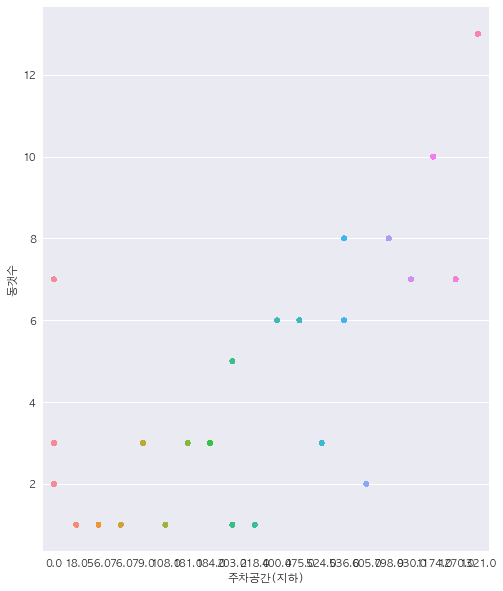

In [35]:
sns.stripplot(x='주차공간(지하)', y='동갯수', data=adj_df)

주차공간 또한 동갯수, 즉 거주민이 많아지면 그에 비례한 주차공간을 확보하기 때문에 선형적 관계로 보여진다. (몇몇 이상치 제외)

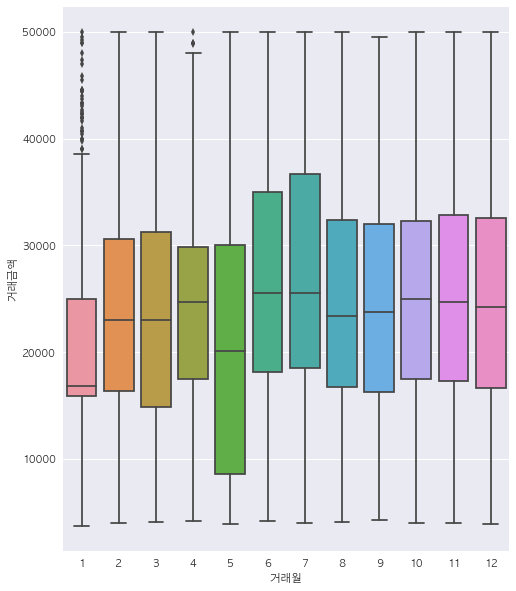

In [36]:
sns.boxplot(x='거래월', y='거래금액', data=adj_df)

In [37]:
# 변수삭제
adj_df.drop(['엘리베이터갯수', '주차공간(지하)', '거래월'], axis=1, inplace=True)

이제 다시 선형모델에 적용시켜보자

In [38]:
X = adj_df.iloc[:, 1:].values
y= adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# fit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_df = pd.Series(coef, index=adj_df.columns[1:])

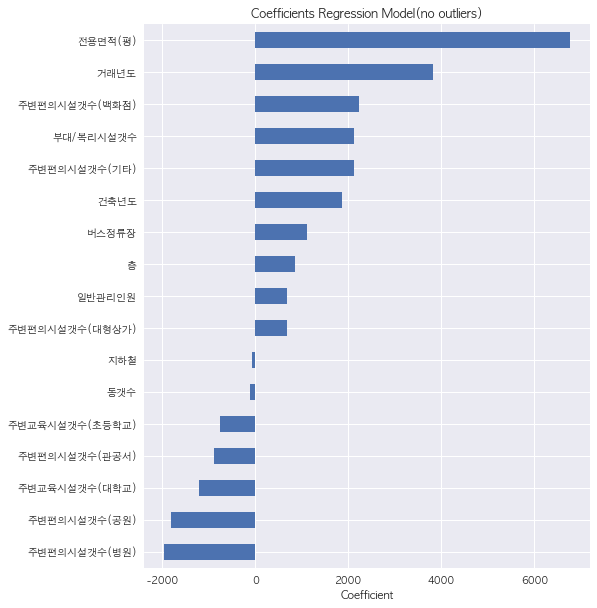

In [39]:
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(no outliers)")
plt.xlabel("Coefficient")

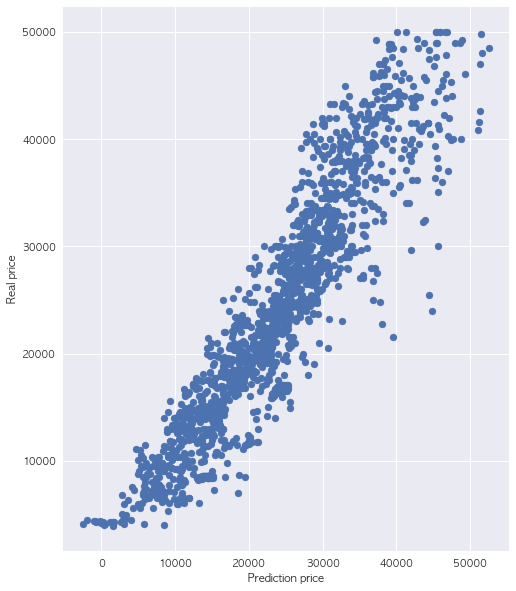

In [40]:
plt.scatter(slr.predict(X_test), y_test)

plt.xlabel('Prediction price')
plt.ylabel('Real price')

In [41]:
print ("Root Mean squared error : %.3f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.3f' % slr.score(X_test, y_test))

Root Mean squared error : 4364.319
Variance score: 0.841


결과는 이전보다 좋진않다.

# 최적화

### Gradient descent boosting을 이용하여 선형모델을 최적화 시켜보자

In [42]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause
from sklearn import ensemble


# #############################################################################
# Load data

X = adj_df.iloc[:, 1:].values
y= adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)


# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
rmse = mean_squared_error(y_test, clf.predict(X_test))**0.5
print("RMSE: %.3f" % rmse)



RMSE: 2058.226


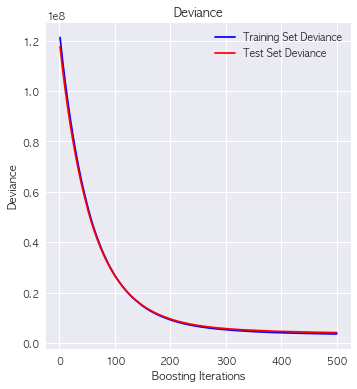

In [43]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



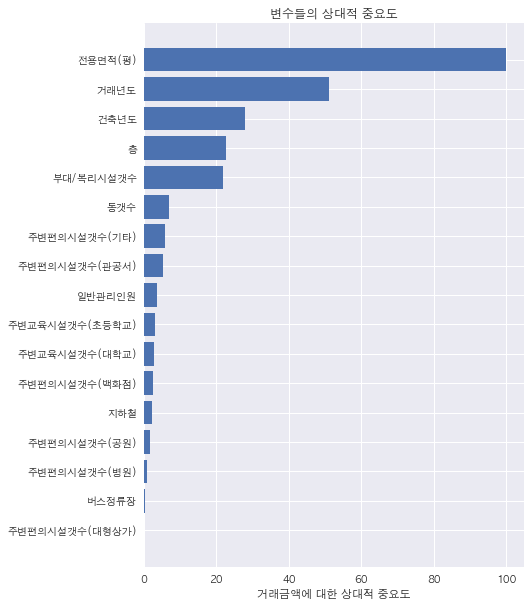

In [44]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplots(figsize=(15, 10))
plt.subplot(1, 2, 2)

# exclude target variable in data frame
adj_df.drop('거래금액', axis=1, inplace=True)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, adj_df.columns[sorted_idx])
plt.xlabel('거래금액에 대한 상대적 중요도')
plt.title('변수들의 상대적 중요도')
plt.show()

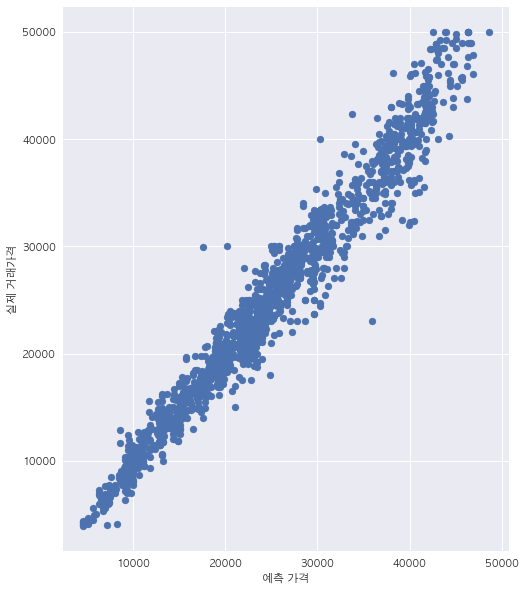

In [45]:
plt.scatter(clf.predict(X_test), y_test)

plt.xlabel('예측 가격')
plt.ylabel('실제 거래가격')

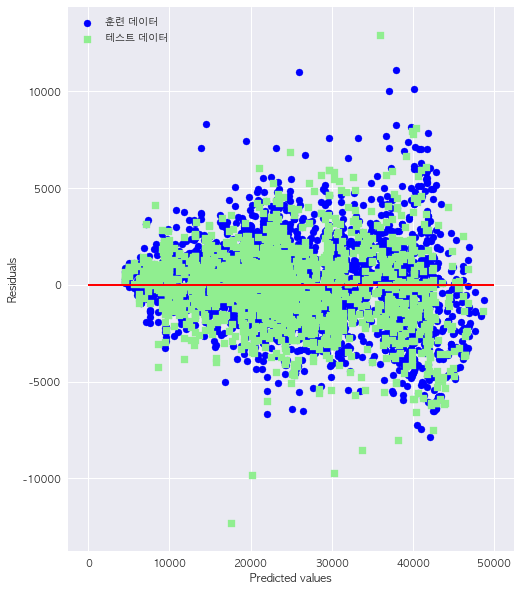

In [46]:
# residual plot
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='훈련 데이터')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='테스트 데이터')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0 ,xmin=0, xmax=50000, lw=2, color='red')
plt.show()

이전보다 나아졌다

높은 상관관계를 보이는 5가지 요소

1. 전용면적(평)
2. 거래년도 
3. 건축년도
4. 층
5. 부대/복리시설갯수